In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Problem 1

In [23]:
data = pd.read_excel('ch2_ex1.xlsx')
data.head()

,Price,Size,Time,Side
0,74.48,300,11:49:34.982000,Ask
1,74.48,500,11:49:39.994000,Ask
2,75.74,100,08:25:16.982000,Ask
3,76.00,150,08:02:01.968000,Ask
4,76.77,20,07:01:01.027000,Ask


In [24]:
ask_data = data[data['Side'] == 'Ask'].sort_values(by='Price', ascending=True)
bid_data = data[data['Side'] == 'Bid'].sort_values(by='Price', ascending=False)


In [25]:
def weighted_average_spread(volume):
    # Cumulative sum of sizes for ask and bid, sorted by price
    ask_cumsum = ask_data['Size'].cumsum()
    bid_cumsum = bid_data['Size'].cumsum()
    
    # Find the minimum price in ask and maximum price in bid for the given volume
    ask_price = ask_data[ask_cumsum >= volume].iloc[0]['Price'] if not ask_data[ask_cumsum >= volume].empty else None
    bid_price = bid_data[bid_cumsum >= volume].iloc[0]['Price'] if not bid_data[bid_cumsum >= volume].empty else None
    
    if ask_price and bid_price:
        absolute_spread = ask_price - bid_price
        mid_price = (ask_price + bid_price) / 2
        relative_spread = absolute_spread / mid_price
    else:
        absolute_spread = None
        relative_spread = None
    
    return absolute_spread, relative_spread

In [26]:
volumes = [100, 500, 1000, 2000]

# Compute weighted average spreads
weighted_spreads = {volume: weighted_average_spread(volume) for volume in volumes}

# Determine depth for 2000 shares or more
ask_depth_2000 = ask_data[ask_data['Size'].cumsum() >= 2000]['Price'].count()
bid_depth_2000 = bid_data[bid_data['Size'].cumsum() >= 2000]['Price'].count()

weighted_spreads, ask_depth_2000, bid_depth_2000

({100: (0.060000000000002274, 0.0008059100067159472),
  500: (0.12000000000000455, 0.001612469766191945),
  1000: (1.6400000000000006, 0.02181431231710562),
  2000: (3.5999999999999943, 0.04765056254136326)},
 9,
 11)

The LOB is deeper than Ask because Bid side has more quantity. (9 / 11)

# Problem 2

## 2-a)

In [27]:
ask_price_930 = 102.31
bid_price_930 = 99.50
ask_price_1030 = 102.55
bid_price_1030 = 100.02

absolute_quoted_spread_930 = ask_price_930 - bid_price_930
mid_point_price_930 = (ask_price_930 + bid_price_930) / 2
relative_quoted_spread_930 = absolute_quoted_spread_930 / mid_point_price_930

absolute_quoted_spread_1030 = ask_price_1030 - bid_price_1030
mid_point_price_1030 = (ask_price_1030 + bid_price_1030) / 2
relative_quoted_spread_1030 = absolute_quoted_spread_1030 / mid_point_price_1030

print("9:30 Absolute Quoted Spread:", absolute_quoted_spread_930)
print("9:30 Relative Quoted Spread:", relative_quoted_spread_930)
print("10:30 Absolute Quoted Spread:", absolute_quoted_spread_1030)
print("10:30 Relative Quoted Spread:", relative_quoted_spread_1030)


9:30 Absolute Quoted Spread: 2.8100000000000023
9:30 Relative Quoted Spread: 0.027847975818839524
10:30 Absolute Quoted Spread: 2.530000000000001
10:30 Relative Quoted Spread: 0.02497901959816361


## 2-b)

In [28]:
executed_buy_order_price = 102.76

absolute_effective_ask_side_half_spread = executed_buy_order_price - mid_point_price_930
relative_effective_ask_side_half_spread = absolute_effective_ask_side_half_spread / mid_point_price_930

print("Absolute Effective Ask-Side Half-Spread:", absolute_effective_ask_side_half_spread)
print("Relative Effective Ask-Side Half-Spread:", relative_effective_ask_side_half_spread)


Absolute Effective Ask-Side Half-Spread: 1.855000000000004
Relative Effective Ask-Side Half-Spread: 0.01838362816510583


## 2-c)

...

## 2-d)

In [29]:
absolute_realized_spread = executed_buy_order_price - bid_price_1030

print("Absolute Realized Spread:", absolute_realized_spread)


Absolute Realized Spread: 2.740000000000009


# Problem 3

The original Roll's estimator of the spread is :

$$ S = 2 \sqrt{-Cov(\Delta P_t , \Delta P_{t+1})}$$

Let's think an adjustment assumes that the impact of trades at the bid or ask is fully represented by $\lambda$ , and that the remaining trades do not alter the covariance used in the original Roll's model.

$$ S_{adj} = 2 \sqrt{-\frac{Cov(\Delta P_t , \Delta P_{t+1})}{\lambda}} $$

This is a simplification and may not capture all dynamics of market microstructure, especially in markets where midprice trades are a significant portion of all trades or where the bid-ask spread is variable.

# Problem 4

The data for this exercise are contained in an Excel ﬁle, Ch2_AGF_data.xls: a record of one day’s transactions in the shares of a French company, AGF, on the Paris Bourse. The data comprise:
• time of the transaction
• size of the transaction
• (average) transaction price
• best bid price immediately before the transaction
• best ask price immediately before the transaction
• direction of trade initiation (−1 for transactions below the midprice, + 1 above the midprice)


In [30]:
data = pd.read_excel('Data_Sets_Chapter_5_data_AGF.xls')
data.head()

,AGF 26/03/2001,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,t,Time,Tradesize,Traprice,Tradedir,Bid,Ask
1,1,09:06:04,20,66.7,-1,66.9,67
2,2,09:06:11,25,66.636,-1,66.65,66.7
3,3,09:06:26,18,66.6,-1,66.6,66.65
4,4,09:07:18,273,66.4163,-1,66.5,66.55


In [31]:
columns = ['Transaction_Number', 'Time', 'Trade_Size', 'Trade_Price', 'Trade_Direction', 'Bid_Price', 'Ask_Price']
data = pd.read_excel('Data_Sets_Chapter_5_data_AGF.xls', skiprows=1, names=columns)

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
data[['Trade_Size', 'Trade_Price', 'Trade_Direction', 'Bid_Price', 'Ask_Price']] = data[['Trade_Size', 'Trade_Price', 'Trade_Direction', 'Bid_Price', 'Ask_Price']].apply(pd.to_numeric)

data.head()

,Transaction_Number,Time,Trade_Size,Trade_Price,Trade_Direction,Bid_Price,Ask_Price
0,1,09:06:04,20,66.7000,-1,66.90,67.00
1,2,09:06:11,25,66.6360,-1,66.65,66.70
2,3,09:06:26,18,66.6000,-1,66.60,66.65
3,4,09:07:18,273,66.4163,-1,66.50,66.55
4,5,09:07:36,27,66.5500,1,66.15,66.55


## 4-a)

	For each transaction, compute the absolute spread S in euro (e); compute the relative spread, s and the log spread: ln(ask)—ln(bid); and compare the average of these three measures. Then compute the average absolute spread for each of the 17 half-hour time periods of the trading day and plot a graph of your results showing the intraday evolution of the spread. What kind of pattern over the day would you expect, a priori?

In [ ]:
# Calculate the spread
data['Absolute_Spread'] = data['Ask_Price'] - data['Bid_Price']
data['Mid_Price'] = (data['Ask_Price'] + data['Bid_Price']) / 2
data['Relative_Spread'] = data['Absolute_Spread'] / data['Mid_Price']
data['Log_Spread'] = np.log(data['Ask_Price']) - np.log(data['Bid_Price'])

# Calculate the averages of these measures
average_absolute_spread = data['Absolute_Spread'].mean()
average_relative_spread = data['Relative_Spread'].mean()
average_log_spread = data['Log_Spread'].mean()

average_absolute_spread, average_relative_spread, average_log_spread

(0.10616570327552977, 0.0016086984772629698, 0.0016086998354762725)

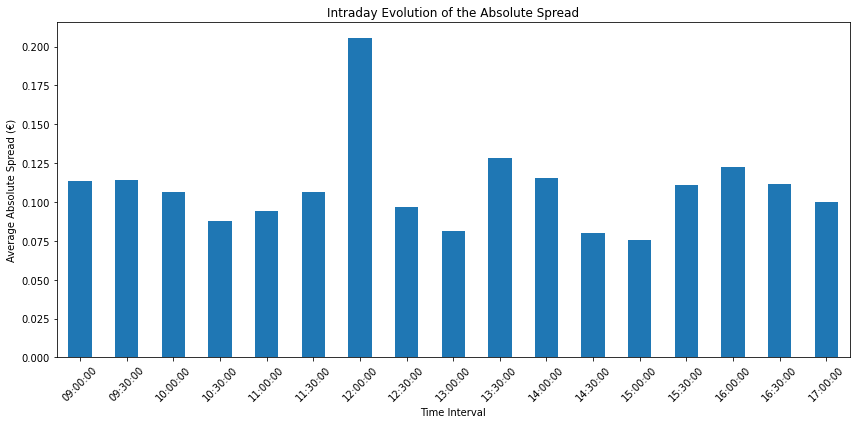

In [33]:
# Convert 'Time' to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')

# Group data by 30-minute intervals and calculate the average absolute spread for each interval
data['Interval'] = data['Time'].dt.floor('30T').dt.time
average_spread_by_interval = data.groupby('Interval')['Absolute_Spread'].mean()

# Visualisation
plt.figure(figsize=(12, 6))
average_spread_by_interval.plot(kind='bar')
plt.title('Intraday Evolution of the Absolute Spread')
plt.xlabel('Time Interval')
plt.ylabel('Average Absolute Spread (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4-b)

Compute and compare the average effective trading cost or “halfspread” in absolute terms, relative terms, and logs.

*** 

Half-spread is half of the difference (spread) between buy and sell prices, and is used as another indicator of market liquidity and transaction costs.

In [34]:
data['Halfspread_Absolute'] = data['Absolute_Spread'] / 2
data['Halfspread_Relative'] = data['Relative_Spread'] / 2
data['Halfspread_Log'] = data['Log_Spread'] / 2

average_halfspread_absolute = data['Halfspread_Absolute'].mean()
average_halfspread_relative = data['Halfspread_Relative'].mean()
average_halfspread_log = data['Halfspread_Log'].mean()

average_halfspread_absolute, average_halfspread_relative, average_halfspread_log


(0.05308285163776488, 0.0008043492386314849, 0.0008043499177381362)

## 4-c)

Compute the VWAP for the day. Then calculate the VWAP for buyer and seller-initiated transactions for the whole day and compare your results with the VWAP benchmark. Repeat, again separately for buyer and seller-initiated transactions, for transactions divided into three time periods: 9:00 a.m–12:00 a.m., 12:00–3:00, and 3:00–5:30 p.m.

In [35]:
# Calculation of transaction value:
# Create a Trade_Value column and define it as the product of the transaction size (Trade_Size) and the transaction price (Trade_Price), which represents the total value of each transaction.
data['Trade_Value'] = data['Trade_Size'] * data['Trade_Price']

# Calculate full VWAP
# Total value of all transactions
total_trade_value = data['Trade_Value'].sum()
# Total trading volume for all transactions
total_volume = data['Trade_Size'].sum()
# A weighted average price for the entire transaction, which is the total transaction value divided by the total transaction volume.
vwap_overall = total_trade_value / total_volume

# VWAP Calculation for Buy Transactions
buyer_data = data[data['Trade_Direction'] == 1]
buyer_trade_value = buyer_data['Trade_Value'].sum()
buyer_volume = buyer_data['Trade_Size'].sum()
vwap_buyer = buyer_trade_value / buyer_volume if buyer_volume > 0 else 0

# VWAP Calculation for Sell Transactions
seller_data = data[data['Trade_Direction'] == -1]
seller_trade_value = seller_data['Trade_Value'].sum()
seller_volume = seller_data['Trade_Size'].sum()
vwap_seller = seller_trade_value / seller_volume if seller_volume > 0 else 0

vwap_overall, vwap_buyer, vwap_seller

(65.97625925897282, 66.0926499559618, 65.88885986691075)

In [36]:
# Add the Value column to calculate the total value of each transaction (the product of the transaction size Trade_Size and the transaction price Trade_Price).
data['Value'] = data['Trade_Size'] * data['Trade_Price']

# Total_value calculates the total value of all transactions (the sum of the values) and total_volume calculates the total volume of all transactions (the sum of the trade_size).
total_value = data['Value'].sum()
total_volume = data['Trade_Size'].sum()

vwap_day = total_value / total_volume

# Buyer and seller VWAP calculations
buyer_vwap = data[data['Trade_Direction'] == 1]['Value'].sum() / data[data['Trade_Direction'] == 1]['Trade_Size'].sum()
seller_vwap = data[data['Trade_Direction'] == -1]['Value'].sum() / data[data['Trade_Direction'] == -1]['Trade_Size'].sum()


# VWAP calculation by specific time interval

time_periods = [
    ('09:00:00', '12:00:00'),
    ('12:00:00', '15:00:00'),
    ('15:00:00', '17:30:00')
]

def calculate_vwap_for_period(start_time, end_time, trade_direction=None):
    filtered_data = data[(data['Time'].dt.time >= pd.to_datetime(start_time).time()) & (data['Time'].dt.time <= pd.to_datetime(end_time).time())]
    if trade_direction is not None:
        filtered_data = filtered_data[filtered_data['Trade_Direction'] == trade_direction]
    total_value = filtered_data['Value'].sum()
    total_volume = filtered_data['Trade_Size'].sum()
    return total_value / total_volume if total_volume > 0 else 0

vwap_time_periods = {period: {'Buyer': calculate_vwap_for_period(period[0], period[1], 1),
                              'Seller': calculate_vwap_for_period(period[0], period[1], -1)}
                     for period in time_periods}

vwap_day, buyer_vwap, seller_vwap, vwap_time_periods

(65.97625925897282,
 66.0926499559618,
 65.88885986691075,
 {('09:00:00', '12:00:00'): {'Buyer': 66.09206370221254,
   'Seller': 65.90238640544808},
  ('12:00:00', '15:00:00'): {'Buyer': 66.10385337566223,
   'Seller': 65.99628722148495},
  ('15:00:00', '17:30:00'): {'Buyer': 66.08637827551495,
   'Seller': 65.85991259218805}})

## 4-d)

Compute Roll’s estimate of the bid-ask spread both in euro (e) and in relative terms (using the logarithm of the prices). Then repeat the computations clock time rather than transaction time: take the last transaction in every 15-minute time interval. Compare your results with those previously obtained: what explains the difference in Roll’s measure?

In [37]:
def compute_rolls_spread_corrected(prices):
    prices_log = np.log(prices.dropna())
    diff_log_prices = np.diff(prices_log)
    squared_diffs = np.square(diff_log_prices)
    rolls_estimate = np.sqrt(np.pi / 2 * np.mean(squared_diffs))
    return rolls_estimate

rolls_spread_euro_corrected = compute_rolls_spread_corrected(data['Trade_Price'])
rolls_spread_relative_corrected = rolls_spread_euro_corrected / data['Trade_Price'].mean()

rolls_spread_euro_resampled_corrected = compute_rolls_spread_corrected(data['Trade_Price'])
rolls_spread_relative_resampled_corrected = rolls_spread_euro_resampled_corrected / data['Trade_Price'].mean()

rolls_spread_euro_corrected, rolls_spread_relative_corrected, rolls_spread_euro_resampled_corrected, rolls_spread_relative_resampled_corrected

(0.0018095354340566339,
 2.741035547062314e-05,
 0.0018095354340566339,
 2.741035547062314e-05)

Same results..? -> Not sure..

## 4-e)

Split the trading day into 15-minute intervals: 9:00–9:15 a.m., 9:159:30 a.m., …, 5:15–5:30 p.m. For each interval, compute the midprice change (from the last transaction of the previous interval to the last one of the current interval; for the ﬁrst interval take the midprice at 9:06:04 as the initial midprice) and the cumulative signed order ﬂow over the interval expressed as a fraction of the day’s total (unsigned) order ﬂow. Perform a regression analysis on the 34 data points you obtain in this way, to estimate the price impact parameter λ. Is the estimated parameter signiﬁcantly different from zero? What is the impact on the midprice of a 1% relative order ﬂow increase?

In [38]:
data['Log_Price'] = np.log(data['Trade_Price'])

data['Price_Diff'] = data['Log_Price'].diff()

price_diffs = data['Price_Diff'].dropna()

# Compute Roll's spread estimator
roll_estimator = ((-1) * (price_diffs**2).mean())**0.5
roll_spread_euro = roll_estimator * 2

# Compute the relative spread
average_price = data['Trade_Price'].mean()
roll_spread_relative = roll_spread_euro / average_price

# Resample the data to 15-minute intervals, taking the last transaction in each interval
data['Datetime'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data.set_index('Datetime', inplace=True)
resampled_data = data.resample('15T').last().dropna(subset=['Log_Price'])

resampled_data['Price_Diff'] = resampled_data['Log_Price'].diff()
price_diffs_resampled = resampled_data['Price_Diff'].dropna()

roll_estimator_resampled = ((-1) * (price_diffs_resampled**2).mean())**0.5
roll_spread_euro_resampled = roll_estimator_resampled * 2

roll_spread_relative_resampled = roll_spread_euro_resampled / average_price

{
    "roll_spread_euro": roll_spread_euro,
    "roll_spread_relative": roll_spread_relative,
    "roll_spread_euro_resampled": roll_spread_euro_resampled,
    "roll_spread_relative_resampled": roll_spread_relative_resampled
}

C:\Users\asaf0\AppData\Local\Temp/ipykernel_14632/3331193592.py:8: RuntimeWarning: invalid value encountered in double_scalars
  roll_estimator = ((-1) * (price_diffs**2).mean())**0.5
C:\Users\asaf0\AppData\Local\Temp/ipykernel_14632/3331193592.py:23: RuntimeWarning: invalid value encountered in double_scalars
  roll_estimator_resampled = ((-1) * (price_diffs_resampled**2).mean())**0.5


{'roll_spread_euro': nan,
 'roll_spread_relative': nan,
 'roll_spread_euro_resampled': nan,
 'roll_spread_relative_resampled': nan}

Since the original calculation resulted in an error, we'll check the mean of squared price differences to ensure it's positive as expected for the Roll model. If negative, the issue could be due to data characteristics not fitting the model assumptions well.

-> Recalculate Roll's spread estimator using absolute value to avoid sqrt of negative number

In [39]:
mean_squared_price_diffs = (price_diffs**2).mean()

roll_estimator_corrected = np.sqrt(abs(mean_squared_price_diffs)) * 2

mean_squared_price_diffs_resampled = (price_diffs_resampled**2).mean()
roll_estimator_resampled_corrected = np.sqrt(abs(mean_squared_price_diffs_resampled)) * 2

{
    "mean_squared_price_diffs": mean_squared_price_diffs,
    "roll_spread_euro_corrected": roll_estimator_corrected,
    "mean_squared_price_diffs_resampled": mean_squared_price_diffs_resampled,
    "roll_spread_euro_resampled_corrected": roll_estimator_resampled_corrected
}

{'mean_squared_price_diffs': 2.0845595518979598e-06,
 'roll_spread_euro_corrected': 0.0028876007701189995,
 'mean_squared_price_diffs_resampled': 1.9376840475061874e-05,
 'roll_spread_euro_resampled_corrected': 0.00880382654873706}

In [40]:
data['Mid_Price'] = (data['Bid_Price'] + data['Ask_Price']) / 2

# Calculate midprice changes for 15-minute intervals
# First, calculate the midprice at the end of each interval
data['Interval'] = data.index.round('15T')
mid_prices_interval_end = data.groupby('Interval')['Mid_Price'].last()

mid_price_changes = mid_prices_interval_end.diff().dropna()

data['Signed_Order_Flow'] = data['Trade_Size'] * data['Trade_Direction']
total_order_flow = data['Trade_Size'].abs().sum()

# Calculate cumulative signed order flow for each 15-minute interval
cumulative_signed_order_flow = data.groupby('Interval')['Signed_Order_Flow'].sum() / total_order_flow

mid_price_changes, cumulative_signed_order_flow = mid_price_changes.align(cumulative_signed_order_flow, join='inner')

X = cumulative_signed_order_flow.values.reshape(-1, 1)
y = mid_price_changes.values

reg = LinearRegression().fit(X, y)

lambda_estimate = reg.coef_[0]
intercept = reg.intercept_

r_squared = reg.score(X, y)

{
    "lambda_estimate": lambda_estimate,
    "intercept": intercept,
    "r_squared": r_squared,
    "data_points": len(X)
}


{'lambda_estimate': 6.54771224539854,
 'intercept': 0.03232879766165984,
 'r_squared': 0.34324905932615113,
 'data_points': 34}